In [1]:
import pandas as pd

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [31]:
features = pd.read_csv("/content/drive/MyDrive/Copy of features.csv")
labels = pd.read_csv("/content/drive/MyDrive/Copy of labels.csv")

In [32]:
features = features.shift()

column_names = features.columns.tolist()
features.iloc[0] = column_names

new_column_names = ["feature {}".format(i) for i in range(len(features.columns))]
features.rename(columns=dict(zip(features.columns, new_column_names)), inplace=True)

In [33]:
labels = labels.shift()

column_names = labels.columns.tolist()
labels.iloc[0] = column_names

new_column_names = ["label"]
labels.rename(columns=dict(zip(labels.columns, new_column_names)), inplace=True)

In [62]:
features

,feature 0,feature 1,feature 2,feature 3,feature 4,feature 5,feature 6,feature 7,feature 8,feature 9,...,feature 1270,feature 1271,feature 1272,feature 1273,feature 1274,feature 1275,feature 1276,feature 1277,feature 1278,feature 1279
0,0.5229696035385132,0.29987668991088867,1.8546563386917114,-0.12764957547187805,0.8136504292488098,-0.14820626378059387,0.08609316498041153,-0.09961701184511185,-0.0603422187268734,2.0590877532958984,...,-0.10570526123046875,-0.1393490880727768,-0.05884527415037155,2.431875228881836,0.06206633150577545,-0.24589484930038452,0.08688231557607651,-0.1262047439813614,0.21802791953086853,0.1690087914466858
1,0.013961,0.122444,-0.132735,-0.118628,0.173108,-0.136272,-0.084335,-0.131051,0.161909,0.824182,...,-0.113773,-0.165884,-0.113729,0.221492,-0.142989,-0.146476,0.226548,-0.138845,0.201534,0.249506
2,0.538563,0.509407,1.77591,-0.127933,1.709609,-0.140871,0.127283,-0.092119,-0.083881,1.833654,...,-0.083452,-0.139409,-0.090185,1.966274,-0.121026,-0.134771,0.824233,-0.1075,0.5303,0.368836
3,-0.074457,-0.116068,-0.19676,-0.011271,-0.168376,1.241772,-0.116697,-0.02938,-0.040485,-0.107858,...,0.860665,-0.084137,0.326265,-0.254838,-0.131203,0.494691,-0.008144,-0.004061,-0.208142,-0.168128
4,-0.051129,-0.174848,-0.02843,1.82042,-0.089466,2.193471,0.114552,-0.02908,3.76516,-0.053691,...,5.197541,1.984923,1.948692,-0.19573,-0.029222,3.375637,0.439649,0.881086,-0.012821,-0.026665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3412,0.070835,0.119985,-0.166408,-0.187417,-0.01141,-0.123623,0.016289,-0.116916,-0.102191,-0.185476,...,-0.122979,-0.175044,-0.183661,0.209731,0.119962,-0.119049,-0.178974,-0.160963,0.554035,0.335833
3413,0.188845,0.18174,0.000457,-0.133928,0.575991,-0.167212,0.093093,-0.111037,-0.112299,0.514472,...,-0.07544,-0.164179,-0.101755,0.973446,0.586366,-0.112277,-0.200143,-0.107301,0.880406,0.564792
3414,0.069198,-0.091497,0.12439,-0.169842,0.235213,-0.221722,-0.084336,-0.168707,-0.071297,0.2577,...,-0.09973,-0.154313,-0.100462,0.484658,0.865008,-0.115266,-0.130826,-0.148095,0.845961,0.496394
3415,0.220922,-0.025789,0.154959,-0.162007,0.24821,-0.193766,-0.148826,-0.153745,-0.106148,1.394486,...,-0.100166,-0.174926,-0.096002,0.072601,-0.136642,-0.139678,0.284274,-0.143948,0.323482,0.430027


In [34]:
# Function to convert row name based on condition
def convert_name(row):
    if 'real' in row.lower():
        return 'real'
    elif 'fake' in row.lower():
        return 'fake'
    else:
        return row

# Apply the conversion function to the 'filename' column
labels['label'] = labels['label'].apply(convert_name)

In [35]:
labels['label'] = labels['label'].map({'real': 1
                                       ,'fake' : 0})

In [36]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Split features and labels
X = features
y = labels

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [37]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, accuracy_score, precision_score, f1_score

# Create and train the kNN model
knn = KNeighborsClassifier()
knn.fit(X_train, y_train)

# Make predictions on the testing set
knn_predictions = knn.predict(X_test)

# Evaluate the model
knn_confusion_matrix = confusion_matrix(y_test, knn_predictions)
knn_accuracy = accuracy_score(y_test, knn_predictions)
knn_precision = precision_score(y_test, knn_predictions, average='weighted')
knn_f1_score = f1_score(y_test, knn_predictions, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)


In [38]:
from sklearn.svm import SVC

# Create and train the SVM model
svm = SVC()
svm.fit(X_train, y_train)

# Make predictions on the testing set
svm_predictions = svm.predict(X_test)

# Evaluate the model
svm_confusion_matrix = confusion_matrix(y_test, svm_predictions)
svm_accuracy = accuracy_score(y_test, svm_predictions)
svm_precision = precision_score(y_test, svm_predictions, average='weighted')
svm_f1_score = f1_score(y_test, svm_predictions, average='weighted')

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


In [39]:
from sklearn.tree import DecisionTreeClassifier

# Create and train the Decision Tree model
decision_tree = DecisionTreeClassifier()
decision_tree.fit(X_train, y_train)

# Make predictions on the testing set
decision_tree_predictions = decision_tree.predict(X_test)

# Evaluate the model
decision_tree_confusion_matrix = confusion_matrix(y_test, decision_tree_predictions)
decision_tree_accuracy = accuracy_score(y_test, decision_tree_predictions)
decision_tree_precision = precision_score(y_test, decision_tree_predictions, average='weighted')
decision_tree_f1_score = f1_score(y_test, decision_tree_predictions, average='weighted')

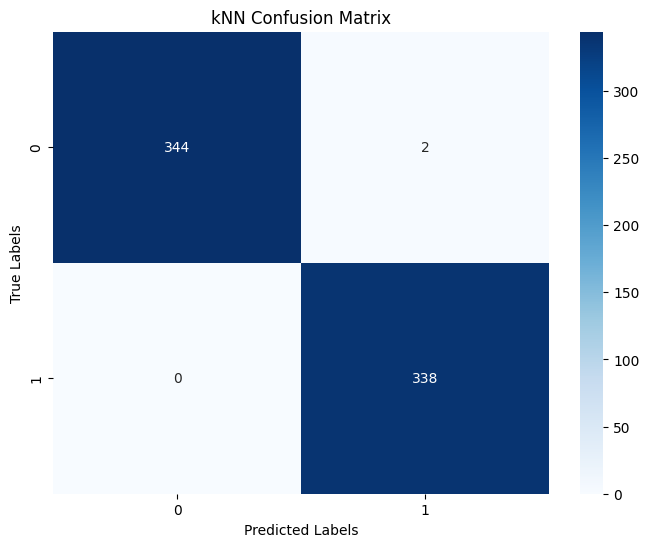

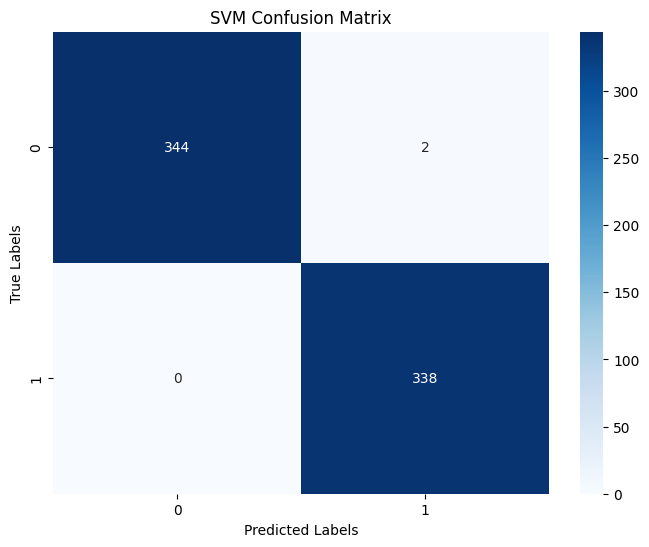

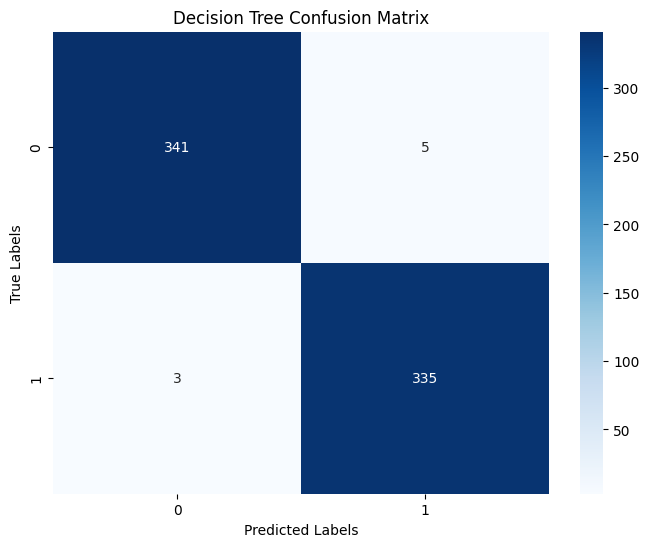

In [40]:
import matplotlib.pyplot as plt
import seaborn as sns

# Plot the confusion matrix for kNN
plt.figure(figsize=(8, 6))
sns.heatmap(knn_confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("kNN Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print('\n')
print('\n')

# Plot the confusion matrix for SVM
plt.figure(figsize=(8, 6))
sns.heatmap(svm_confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("SVM Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

print('\n')
print('\n')

# Plot the confusion matrix for Decision Tree
plt.figure(figsize=(8, 6))
sns.heatmap(decision_tree_confusion_matrix, annot=True, fmt="d", cmap="Blues")
plt.title("Decision Tree Confusion Matrix")
plt.xlabel("Predicted Labels")
plt.ylabel("True Labels")
plt.show()

In [41]:
print("kNN Accuracy:", knn_accuracy)
print("kNN Precision:", knn_precision)
print("kNN F1 Score:", knn_f1_score)

print("\nSVM Accuracy:", svm_accuracy)
print("SVM Precision:", svm_precision)
print("SVM F1 Score:", svm_f1_score)

print("\nDecision Tree Accuracy:", decision_tree_accuracy)
print("Decision Tree Precision:", decision_tree_precision)
print("Decision Tree F1 Score:", decision_tree_f1_score)

kNN Accuracy: 0.9970760233918129
kNN Precision: 0.9970932232542139
kNN F1 Score: 0.9970760983944191

SVM Accuracy: 0.9970760233918129
SVM Precision: 0.9970932232542139
SVM F1 Score: 0.9970760983944191

Decision Tree Accuracy: 0.9883040935672515
Decision Tree Precision: 0.9883215934272527
Decision Tree F1 Score: 0.9883043935776767


/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)
/usr/local/lib/python3.10/dist-packages/sklearn/neighbors/_classification.py:215: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for 

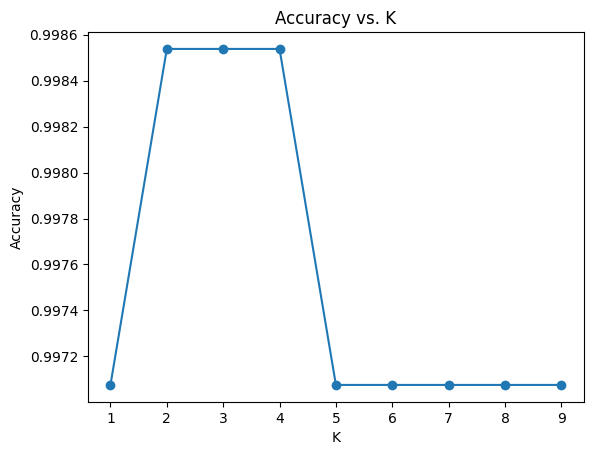

In [42]:
k_values = range(1, 10)
accuracy_scores = []

# Iterate over different values of K
for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    knn_predictions = knn.predict(X_test)
    accuracy = accuracy_score(y_test, knn_predictions)
    accuracy_scores.append(accuracy)

# Plot the accuracy scores against K values
plt.plot(k_values, accuracy_scores, marker='o')
plt.title('Accuracy vs. K')
plt.xlabel('K')
plt.ylabel('Accuracy')
plt.xticks(k_values)
plt.show()

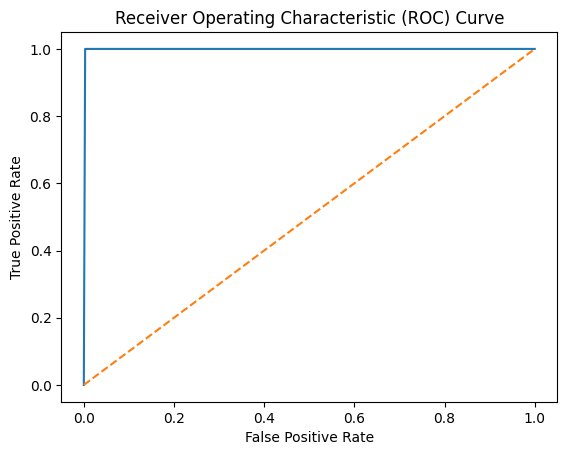

AUC Score: 0.9985335362725314


In [47]:
from sklearn.metrics import roc_curve, roc_auc_score

# Get the predicted probabilities for the positive class
knn_probs = knn.predict_proba(X_test)[:,1]

# Compute the false positive rate, true positive rate, and threshold values
fpr, tpr, thresholds = roc_curve(y_test, knn_probs)

# Plot the ROC curve
plt.plot(fpr, tpr)
plt.plot([0, 1], [0, 1], linestyle='--')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.show()

# Compute the AUC score
auc_score = roc_auc_score(y_test, knn_probs)
print("AUC Score:", auc_score)

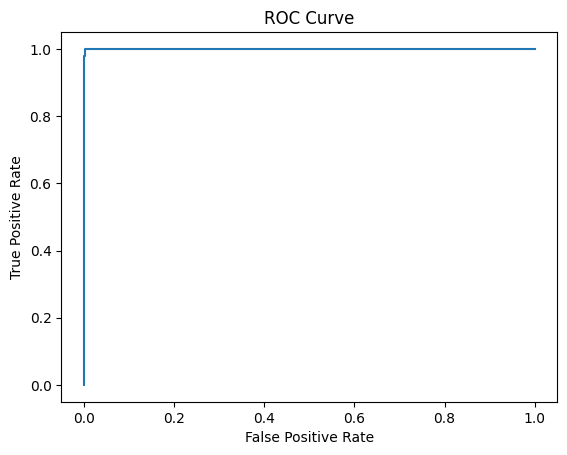

In [56]:
from sklearn.metrics import roc_curve, roc_auc_score

y_scores = svm.decision_function(X_test)
fpr, tpr, _ = roc_curve(y_test, y_scores)

plt.plot(fpr, tpr)
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve')
plt.show()

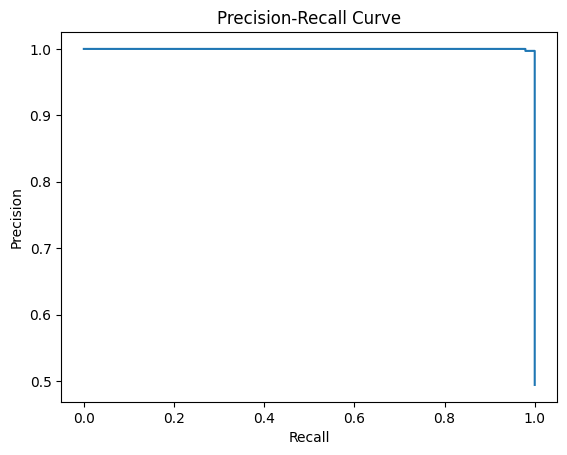

In [54]:
from sklearn.metrics import precision_recall_curve

precision, recall, _ = precision_recall_curve(y_test, y_scores)

plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.show()

In [66]:
def convert_to_colors(array):
    colors = []
    for element in array:
        if element == 1:
            colors.append('blue')
        else:
            colors.append('red')
    return colors

/usr/local/lib/python3.10/dist-packages/sklearn/utils/validation.py:1143: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
<ipython-input-70-6ef34c18235d>:27: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X_pca[:, 0], X_pca[:, 1], c = convert_to_colors(y_train['label']), cmap=plt.cm.Paired)


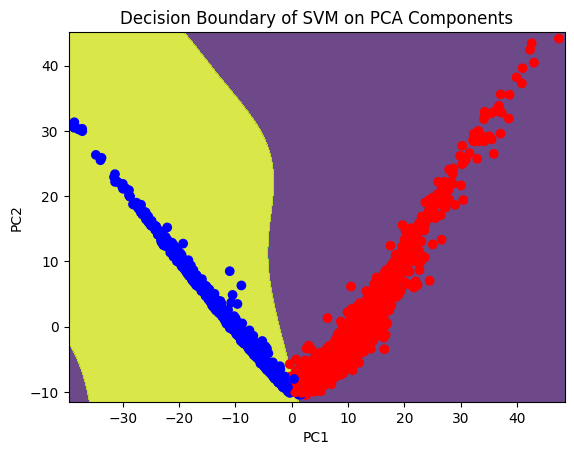

In [70]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

# Step 1: Perform PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_train)

# Step 2: Transform test data using PCA
X_test_pca = pca.transform(X_test)

# Step 3: Fit SVM model on transformed data
svm.fit(X_pca, y_train)

# Step 4: Generate a meshgrid in the feature space
x_min, x_max = X_pca[:, 0].min() - 1, X_pca[:, 0].max() + 1
y_min, y_max = X_pca[:, 1].min() - 1, X_pca[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, 0.01),
                     np.arange(y_min, y_max, 0.01))

# Step 5: Use SVM model to predict class labels for each point in meshgrid
Z = svm.predict(np.c_[xx.ravel(), yy.ravel()])
Z = Z.reshape(xx.shape)

# Step 6: Plot the decision boundary
plt.contourf(xx, yy, Z, alpha=0.8)
plt.scatter(X_pca[:, 0], X_pca[:, 1], c = convert_to_colors(y_train['label']), cmap=plt.cm.Paired)
plt.xlabel('PC1')
plt.ylabel('PC2')
plt.title('Decision Boundary of SVM on PCA Components')
plt.show()